In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
melb_data = pd.read_csv('mel_house/melb_data_processed.csv')

In [3]:
melb_data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Car,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.5,3067.0,1.0,120.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,1.0,120.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,0.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.5,3067.0,1.0,120.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,0.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [4]:
# re-check for missing values
melb_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Car              0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [5]:
melb_data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.03,0.97,1.0,2.0,3.0,4.0,16.0
Distance,34857.0,11.18,6.79,0.0,6.4,10.3,14.0,48.1
Postcode,34857.0,3116.06,109.02,3000.0,3051.0,3103.0,3156.0,3978.0
Car,34857.0,1.80,0.88,0.0,1.0,2.0,2.0,26.0
BuildingArea,34857.0,135.87,252.71,0.0,120.0,120.0,120.0,44515.0
Propertycount,34857.0,7574.10,4429.83,83.0,4385.0,6763.0,10412.0,21650.0


In [6]:
py_num_types = ['int16','int32','int64','float16','float32','float64']

In [8]:
# check for numeric features
numerical_columns = list(melb_data.select_dtypes(include=py_num_types).columns)
numerical_columns

['Rooms', 'Distance', 'Postcode', 'Car', 'BuildingArea', 'Propertycount']

In [10]:
# store the numeric features
clean_data_numeric = melb_data[numerical_columns]

In [11]:
clean_data_numeric.sample(10)

,Rooms,Distance,Postcode,Car,BuildingArea,Propertycount
30319,3,19.6,3076.0,2.0,114.0,10926.0
679,3,12.2,3147.0,2.0,120.0,2894.0
5593,5,7.9,3079.0,2.0,292.0,5549.0
30740,1,2.4,3121.0,2.0,120.0,14949.0
19851,3,7.7,3124.0,1.0,120.0,8920.0
1864,3,11.2,3186.0,1.0,120.0,10579.0
19978,2,38.0,3199.0,1.0,75.0,17055.0
26729,2,3.0,3206.0,2.0,120.0,3280.0
15119,3,29.8,3338.0,2.0,120.0,4718.0
7549,3,14.7,3167.0,2.0,110.0,3692.0


In [12]:
clean_data_numeric.shape

(34857, 6)

In [13]:
# check the info
clean_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 6 columns):
Rooms            34857 non-null int64
Distance         34857 non-null float64
Postcode         34857 non-null float64
Car              34857 non-null float64
BuildingArea     34857 non-null float64
Propertycount    34857 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.6 MB


In [14]:
# calcuate the correlation
pearson_corr = clean_data_numeric.corr(method='pearson')

pearson_corr

,Rooms,Distance,Postcode,Car,BuildingArea,Propertycount
Rooms,1.000000,0.271511,0.085890,0.317095,0.105768,-0.071841
Distance,0.271511,1.000000,0.481565,0.204164,0.051534,-0.018260
Postcode,0.085890,0.481565,1.000000,0.058614,0.030294,0.016983
Car,0.317095,0.204164,0.058614,1.000000,0.068741,-0.005099
BuildingArea,0.105768,0.051534,0.030294,0.068741,1.000000,-0.016203
Propertycount,-0.071841,-0.018260,0.016983,-0.005099,-0.016203,1.000000


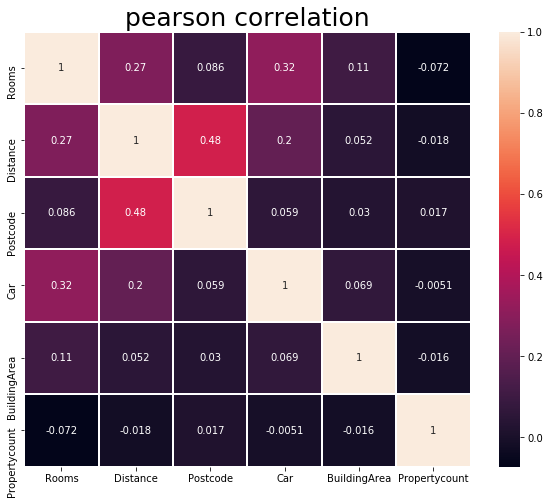

In [15]:
# visualizing pearson correlation using heatamap
plt.figure(figsize=(10,8))

sns.heatmap(pearson_corr,
           linewidth=1,
           annot=True,
           annot_kws={'size' : 10})
plt.title('pearson correlation', fontsize=25)

plt.show()

In [16]:
# using the spearman correlation
# calcuate the correlation
spearman_corr = clean_data_numeric.corr(method='spearman')

spearman_corr

,Rooms,Distance,Postcode,Car,BuildingArea,Propertycount
Rooms,1.000000,0.332933,0.064676,0.356351,0.453852,-0.062226
Distance,0.332933,1.000000,0.254166,0.249845,0.154044,-0.086091
Postcode,0.064676,0.254166,1.000000,0.063145,0.063090,0.073073
Car,0.356351,0.249845,0.063145,1.000000,0.267177,-0.013463
BuildingArea,0.453852,0.154044,0.063090,0.267177,1.000000,-0.026769
Propertycount,-0.062226,-0.086091,0.073073,-0.013463,-0.026769,1.000000


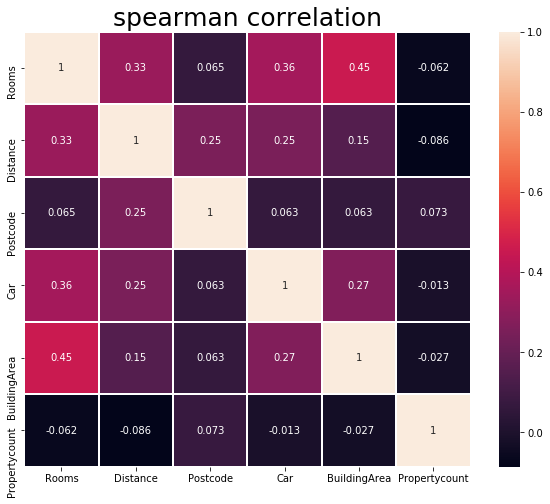

In [17]:
# visualizing spearman correlation using heatamap
plt.figure(figsize=(10,8))

sns.heatmap(spearman_corr,
           linewidth=1,
           annot=True,
           annot_kws={'size' : 10})
plt.title('spearman correlation', fontsize=25)

plt.show()

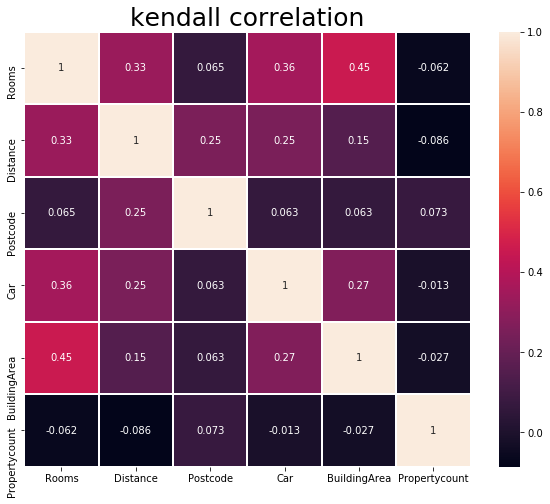

In [18]:
# visualizing kendall correlation using heatamap
kendall_corr = clean_data_numeric.corr(method='kendall')

plt.figure(figsize=(10,8))

sns.heatmap(spearman_corr,
           linewidth=1,
           annot=True,
           annot_kws={'size' : 10})
plt.title('kendall correlation', fontsize=25)

plt.show()

In [19]:
# Another correlation visualization tools
!pip install yellowbrick --upgrade

Requirement not upgraded as not directly required: cycler>=0.10.0 in c:\users\taofe\anaconda3\lib\site-packages (from yellowbrick) (0.10.0)
Requirement not upgraded as not directly required: scipy>=1.0.0 in c:\users\taofe\anaconda3\lib\site-packages (from yellowbrick) (1.1.0)
Requirement not upgraded as not directly required: matplotlib!=3.0.0,>=2.0.2 in c:\users\taofe\anaconda3\lib\site-packages (from yellowbrick) (2.2.2)
Requirement not upgraded as not directly required: numpy>=1.13.0 in c:\users\taofe\anaconda3\lib\site-packages (from yellowbrick) (1.14.3)
Requirement not upgraded as not directly required: six in c:\users\taofe\anaconda3\lib\site-packages (from cycler>=0.10.0->yellowbrick) (1.11.0)
Requirement not upgraded as not directly required: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\users\taofe\anaconda3\lib\site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (2.2.0)
Requirement not upgraded as not directly required: python-dateutil>=2.1 in c:\users\taofe\anacond

pipenv 2018.11.26 requires virtualenv, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
# separate features and target
target = clean_data_numeric['Rooms']

features = clean_data_numeric.drop('Rooms', axis=1)

In [21]:
# use yelloebrick for feature correlation between taget variable and featurs.
from yellowbrick.target import FeatureCorrelation

features_names = list(features.columns)

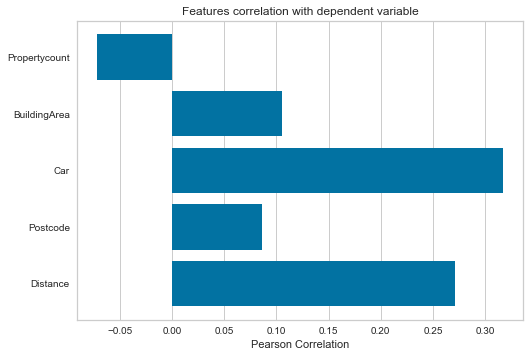

In [23]:
# Instantiate feature correlation
visualizer = FeatureCorrelation(labels = features_names, method='pearson')

visualizer.fit(features,target)

visualizer.poof()

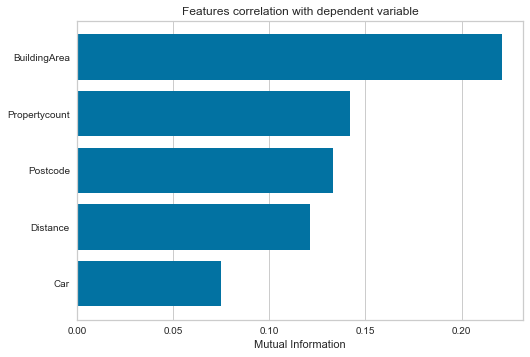

In [26]:
# another techniques to calculate correlation
visualizer = FeatureCorrelation(method='mutual_info-regression',
                               feature_names=features_names, sort=True)

visualizer.fit(features, target)
visualizer.poof()
